![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

filename_features = "../C:/Users/harle/Data-science/UCI HAR Dataset/features.txt"
filename_labels = "../C:/Users/harle/Data-science/UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "../C:/Users/harle/Data-science/train/UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "../C:/Users/harle/Data-science/train/UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "../C:/Users/harle/Data-science/train/UCI HAR Dataset/train/y_train.txt"

filename_subtest = "../C:/Users/harle/Data-science/test/UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "../C:/Users/harle/Data-science/test/UCI HAR Dataset/test/X_test.txt"
filename_ytest = "../C:/Users/harle/Data-science/test/UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv('features.txt', header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv('activity_labels.txt', delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv('subject_train.txt', header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv('y_train.txt', header=None, names=['cod_label'])

subject_test = pd.read_csv('subject_test.txt', header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv('X_test.txt', delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv('y_test.txt', header=None, names=['cod_label'])

C:\Users\harle\AppData\Local\Temp\ipykernel_20448\2173912387.py:24: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv('features.txt', header=None, names=['nome_var'], squeeze=True, sep="#")
C:\Users\harle\AppData\Local\Temp\ipykernel_20448\2173912387.py:27: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv('subject_train.txt', header=None, names=['subject_id'], squeeze=True)
C:\Users\harle\AppData\Local\Temp\ipykernel_20448\2173912387.py:31: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test = pd.read_csv('subject_test.txt', header=None, names=['subject_id'], squeeze=True)


## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [62]:
%%time
clf = DecisionTreeClassifier(random_state=1234, ccp_alpha=0.001).fit(X_train, y_train)
print(X_train.shape)
print(y_train.shape)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))


(7352, 561)
(7352, 1)
0.9757889009793254
0.8795385137427892
CPU times: total: 3.94 s
Wall time: 4.06 s


## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [63]:
%%time
prcomp = PCA().fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste = prcomp.transform(X_test)

print(pc_treino.shape)
print(pc_teste.shape)


(7352, 561)
(2947, 561)
CPU times: total: 969 ms
Wall time: 313 ms


In [64]:
n = 1

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:, :n], columns=colunas)
pc_test = pd.DataFrame(pc_teste[:, :n], columns=colunas)

pc_train.head()

,cp1
0,-5.520280
1,-5.535350
2,-5.474988
3,-5.677232
4,-5.748749


In [65]:
%%time
clf_pca = DecisionTreeClassifier(random_state=1234, ccp_alpha=0.001).fit(pc_train, y_train)

CPU times: total: 93.8 ms
Wall time: 44.6 ms


In [66]:
print(clf_pca.score(pc_train, y_train))
print(clf_pca.score(pc_test, y_test))

0.499727965179543
0.45707499151679676


## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


In [67]:
%%time
prcomp = PCA().fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste = prcomp.transform(X_test)


CPU times: total: 1.28 s
Wall time: 299 ms


In [68]:
%%time

lista = [1, 2, 5, 10, 50]
score_train = []
score_test = []

for n in lista:
    colunas = ['cp'+str(x+1) for x in list(range(n))]

    pc_train = pd.DataFrame(pc_treino[:, :n], columns=colunas)
    pc_test = pd.DataFrame(pc_teste[:, :n], columns=colunas)

    clf = DecisionTreeClassifier(random_state=100, ccp_alpha=0.001).fit(pc_train, y_train)

    s_tr = clf.score(pc_train, y_train)
    score_train.append(s_tr)

    s_te = clf.score(pc_test, y_test)
    score_test.append(s_te)

CPU times: total: 1.23 s
Wall time: 697 ms


In [69]:
resultados = {'quantidade_componentes': lista, 'score_treino': score_train, 'score_teste': score_test}

df = pd.DataFrame(resultados)
df

,quantidade_componentes,score_treino,score_teste
0,1,0.499728,0.457075
1,2,0.612758,0.584662
2,5,0.846028,0.788938
3,10,0.892682,0.823889
4,50,0.919342,0.823210


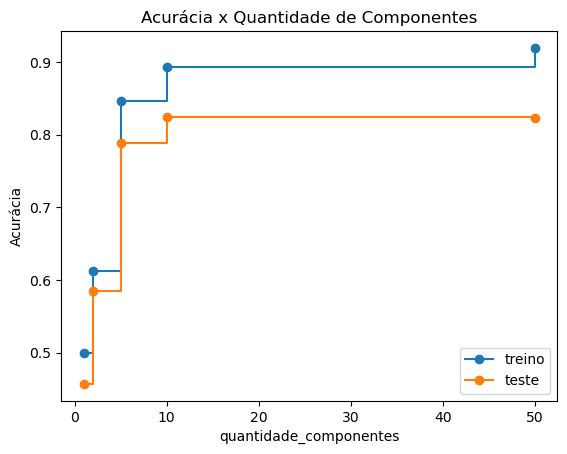

In [70]:
fig, ax = plt.subplots()

ax.set_xlabel("quantidade_componentes")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x Quantidade de Componentes")
ax.plot(df['quantidade_componentes'], df['score_treino'], marker='o', label="treino", drawstyle="steps-post")
ax.plot(df['quantidade_componentes'], df['score_teste'], marker='o', label="teste", drawstyle="steps-post")

ax.legend()
plt.show()

In [71]:
%%time

n = 10

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:, :n], columns=colunas)
pc_test = pd.DataFrame(pc_teste[:, :n], columns=colunas)

clf = DecisionTreeClassifier(random_state=1234, ccp_alpha=0.001).fit(pc_train, y_train)

CPU times: total: 78.1 ms
Wall time: 87.2 ms


## Conclua

- O que aconteceu com a acurácia?
- O que aconteceu com o tempo de processamento?

Acurácia teve um aumento até os 10 componentes e se estabilizou na base de teste e de treino

O tempo de processamento diminuiu 